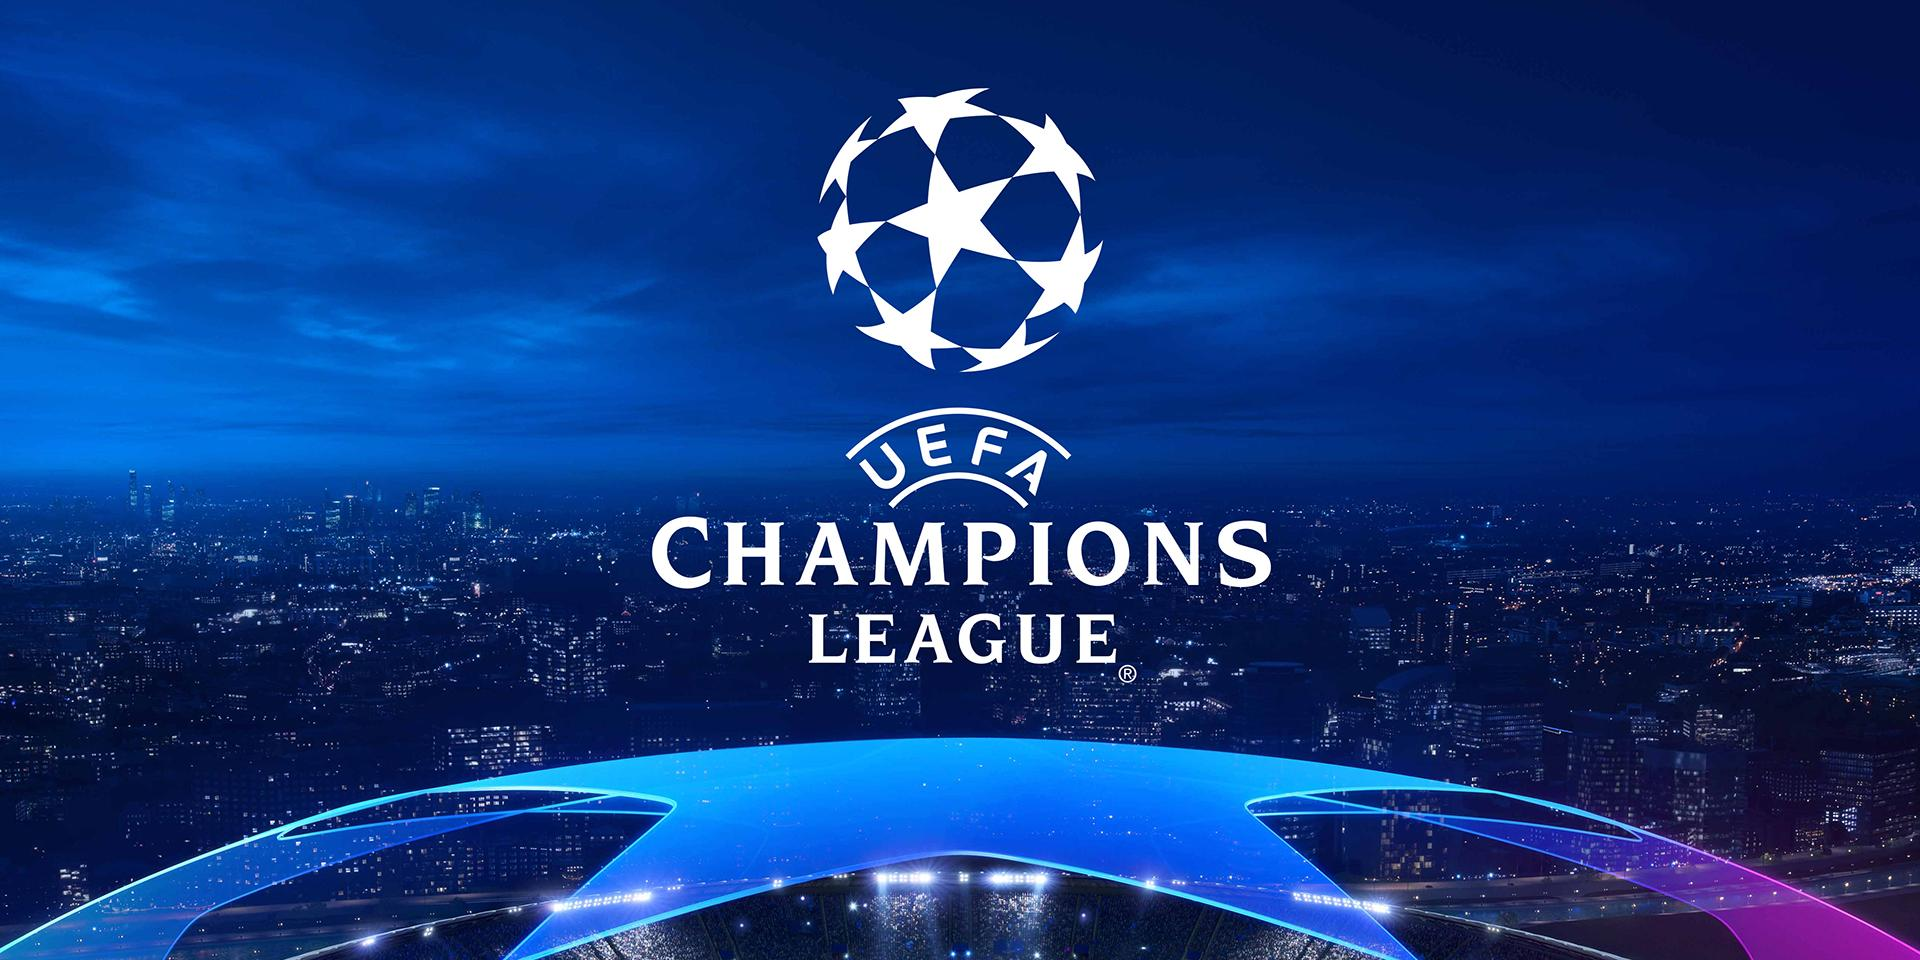

## 1\. Análise desempenho times do TOP 5 Ligas na Champions League da temporada 1980-1981 até a temporada 2020-2021

Vamos verificar quais ligas mais colocaram seus clubes em finais e venceram as mesmas na Champions League por década

## 2\. Importando os pacotes necessários no projeto

In [289]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 3\. Exploração de Dados

Os dados estão no formato CSV e contém informações sobre os clubes, a liga de cada um deles, informações sobre a região, população e desempenho desde as Quartas de Finais até a final. Estamos interessados em explicar a coluna **fase_alcancada**,  que indica a fase em que o clube terminou a Liga dos Campeões. Uma descrição completa dos atributos está abaixo.

| Coluna  | Descrição |
| ------- | --------- |
| ano      | Ano da competição |
| codigo_clube | Sigla do nome do Clube |
| fase_alcancada   | ---|
| liga_clube    | Liga Nacional que o time disputa |
| regiao | Região em que o clube fica |
| decada | --- |
| superliga | Indica se o clube optou pela nova Super Liga |
| cidade | ---- |
| codigo_area | ----|
| metropole | ----- |
| populacao | ----- |
| gdp | ----- |
| país | ------ |
| eurostat | ------ |
| ecb | ----- |
| sigla_pais | ----- |
| cown | ------ |

In [290]:
df = pd.read_csv('UCLQuarterFinals.csv')

In [291]:
df.head(n=5)

,year,code,name,round,league,region,decade,superliga,city,areacode,metropol,pop,gdp,country,eurostat,ecb,cowc,cown
0,1981,LIV,Liverpool FC,W,England,Big 5,1980s,Yes,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
1,1981,MAD,Real Madrid CF,RU,Spain,Big 5,1980s,Yes,Madrid,ES001,Madrid,6791667.0,342534.0,Spain,ES,ES,SPN,230.0
2,1981,BMN,FC Bayern,SF,Germany,Big 5,1980s,No,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
3,1981,INT,FC Inter Milan,SF,Italy,Big 5,1980s,Yes,Milano,IT002,Milan,5145657.0,301366.0,Italy,IT,IT,ITA,325.0
4,1981,BEL,Red Star,QF,Serbia,East,1980s,No,Belgrade,Belgrade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **3.1. Estrutura** 

In [292]:
df.shape

(328, 18)

### **3.2. Schema** 

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       328 non-null    int64  
 1   code       328 non-null    object 
 2   name       328 non-null    object 
 3   round      328 non-null    object 
 4   league     328 non-null    object 
 5   region     328 non-null    object 
 6   decade     328 non-null    object 
 7   superliga  328 non-null    object 
 8   city       328 non-null    object 
 9   areacode   328 non-null    object 
 10  metropol   294 non-null    object 
 11  pop        294 non-null    float64
 12  gdp        289 non-null    float64
 13  country    319 non-null    object 
 14  eurostat   319 non-null    object 
 15  ecb        319 non-null    object 
 16  cowc       319 non-null    object 
 17  cown       319 non-null    float64
dtypes: float64(3), int64(1), object(14)
memory usage: 46.2+ KB


In [294]:
df.dtypes

year           int64
code          object
name          object
round         object
league        object
region        object
decade        object
superliga     object
city          object
areacode      object
metropol      object
pop          float64
gdp          float64
country       object
eurostat      object
ecb           object
cowc          object
cown         float64
dtype: object

In [295]:
df.select_dtypes('object').describe().transpose()


,count,unique,top,freq
code,328,84,BMN,26
name,328,84,FC Bayern,26
round,328,4,QF,164
league,328,26,Spain,61
region,328,3,Big 5,225
decade,328,4,2010s,104
superliga,328,2,No,195
city,328,67,Madrid,28
areacode,328,67,ES001,28
metropol,294,49,Madrid,28


In [296]:
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,328.0,2.001000e+03,1.185024e+01,1981.0,1991.0,2001.0,2011.0,2021.0
pop,294.0,4.502595e+06,3.703125e+06,276097.0,1760085.0,3097965.0,5145657.0,15462452.0
gdp,289.0,2.313753e+05,2.203425e+05,8056.0,76575.0,206526.0,284400.0,913737.0
cown,319.0,2.645925e+02,7.601839e+01,200.0,220.0,230.0,325.0,640.0


### **3.3. Dados faltantes** 

Checando quantas colunas tem registros nulos

In [297]:
df.isna().any()

year         False
code         False
name         False
round        False
league       False
region       False
decade       False
superliga    False
city         False
areacode     False
metropol      True
pop           True
gdp           True
country       True
eurostat      True
ecb           True
cowc          True
cown          True
dtype: bool

Analisando a proporção de nulos por coluna (Quantos % destas colunas estão nulos?)

In [298]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

    stats_dados_faltantes = []
    for col in df.columns:
        if df[col].isna().any():
            qtd, _ = df[df[col].isna()].shape
            total, _ = df.shape
            dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
            stats_dados_faltantes.append(dict_dados_faltantes)

    for stat in stats_dados_faltantes:
        print(stat)

In [299]:
stats_dados_faltantes(df=df)

{'metropol': {'quantidade': 34, 'porcentagem': 10.37}}
{'pop': {'quantidade': 34, 'porcentagem': 10.37}}
{'gdp': {'quantidade': 39, 'porcentagem': 11.89}}
{'country': {'quantidade': 9, 'porcentagem': 2.74}}
{'eurostat': {'quantidade': 9, 'porcentagem': 2.74}}
{'ecb': {'quantidade': 9, 'porcentagem': 2.74}}
{'cowc': {'quantidade': 9, 'porcentagem': 2.74}}
{'cown': {'quantidade': 9, 'porcentagem': 2.74}}


## 4\. Transformação e limpeza de dados

#### Traduzindo as colunas ####

In [300]:
df.columns

Index(['year', 'code', 'name', 'round', 'league', 'region', 'decade',
       'superliga', 'city', 'areacode', 'metropol', 'pop', 'gdp', 'country',
       'eurostat', 'ecb', 'cowc', 'cown'],
      dtype='object')

In [301]:
renomear = {
    'year': 'ano',
    'code': 'codigo_clube',
    'round': 'fase_alcancada',
    'league': 'liga_clube',
    'region': 'regiao',
    'decade': 'decada',
    'superliga': 'superliga',
    'city': 'cidade',
    'areacode': 'codigo_area',
    'metropol': 'metropole',
    'pop': 'populacao',
    'gdp': 'gdp',
    'country': 'país',
    'eurostat': 'eurostat',
    'ecb': 'ecb',
    'cowc': 'sigla_pais',
    'cown': 'cown'
}

In [302]:
df = df.rename(columns = renomear)
df

,ano,codigo_clube,name,fase_alcancada,liga_clube,regiao,decada,superliga,cidade,codigo_area,metropole,populacao,gdp,país,eurostat,ecb,sigla_pais,cown
0,1981,LIV,Liverpool FC,W,England,Big 5,1980s,Yes,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
1,1981,MAD,Real Madrid CF,RU,Spain,Big 5,1980s,Yes,Madrid,ES001,Madrid,6791667.0,342534.0,Spain,ES,ES,SPN,230.0
2,1981,BMN,FC Bayern,SF,Germany,Big 5,1980s,No,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
3,1981,INT,FC Inter Milan,SF,Italy,Big 5,1980s,Yes,Milano,IT002,Milan,5145657.0,301366.0,Italy,IT,IT,ITA,325.0
4,1981,BEL,Red Star,QF,Serbia,East,1980s,No,Belgrade,Belgrade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,2021,PSG,Paris SG,SF,France,Big 5,2010s,No,Paris,FR001,Paris,12914803.0,913737.0,France,FR,FR,FRN,220.0
324,2021,LIV,Liverpool FC,QF,England,Big 5,2010s,Yes,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
325,2021,BMN,FC Bayern,QF,Germany,Big 5,2010s,No,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
326,2021,POR,FC Porto,QF,Portugal,Small,2010s,No,Porto,PT002,Porto,1272189.0,38974.0,Portugal,PT,PT,POR,235.0


#### Traduzindo os valores das colunas superliga, liga_clube e país ####

In [303]:
df.superliga.unique()

array(['Yes', 'No'], dtype=object)

In [304]:
sim_nao = {
    'Yes': 'Sim',
    'No': 'Não'
}

In [305]:
df.superliga.map(sim_nao)

0      Sim
1      Sim
2      Não
3      Sim
4      Não
      ... 
323    Não
324    Sim
325    Não
326    Não
327    Não
Name: superliga, Length: 328, dtype: object

In [306]:
df.superliga = df.superliga.map(sim_nao) 

In [307]:
df

,ano,codigo_clube,name,fase_alcancada,liga_clube,regiao,decada,superliga,cidade,codigo_area,metropole,populacao,gdp,país,eurostat,ecb,sigla_pais,cown
0,1981,LIV,Liverpool FC,W,England,Big 5,1980s,Sim,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
1,1981,MAD,Real Madrid CF,RU,Spain,Big 5,1980s,Sim,Madrid,ES001,Madrid,6791667.0,342534.0,Spain,ES,ES,SPN,230.0
2,1981,BMN,FC Bayern,SF,Germany,Big 5,1980s,Não,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
3,1981,INT,FC Inter Milan,SF,Italy,Big 5,1980s,Sim,Milano,IT002,Milan,5145657.0,301366.0,Italy,IT,IT,ITA,325.0
4,1981,BEL,Red Star,QF,Serbia,East,1980s,Não,Belgrade,Belgrade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,2021,PSG,Paris SG,SF,France,Big 5,2010s,Não,Paris,FR001,Paris,12914803.0,913737.0,France,FR,FR,FRN,220.0
324,2021,LIV,Liverpool FC,QF,England,Big 5,2010s,Sim,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
325,2021,BMN,FC Bayern,QF,Germany,Big 5,2010s,Não,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
326,2021,POR,FC Porto,QF,Portugal,Small,2010s,Não,Porto,PT002,Porto,1272189.0,38974.0,Portugal,PT,PT,POR,235.0


In [308]:
df.país.unique()

array(['United Kingdom', 'Spain', 'Germany', 'Italy', nan, 'Russia',
       'Czechia', 'Bulgaria', 'Belgium', 'Romania', 'Ukraine', 'Poland',
       'Portugal', 'Austria', 'Belarus', 'France', 'Greece', 'Sweden',
       'Finland', 'Turkey', 'Denmark', 'Netherlands', 'Croatia', 'Norway',
       'Cyprus'], dtype=object)

In [309]:
df.liga_clube.unique()



array(['England', 'Spain', 'Germany', 'Italy', 'Serbia', 'Russia',
       'Czechia', 'Bulgaria', 'Belgium', 'Romania', 'Ukraine', 'Poland',
       'Portugal', 'Scotland', 'Austria', 'Bielorrusia', 'France',
       'Greece', 'Sweden', 'Finland', 'Turkey', 'Denmark', 'Netherlands',
       'Croatia', 'Norway', 'Cyprus'], dtype=object)

In [310]:
pais_traduzido = {
    'United Kingdom': 'Reino Unido',
    'Spain': 'Espanha',
    'Germany': 'Alemanha',
    'Italy': 'Itália',
    'Russia': 'Rússia',
    'Czechia': 'República Tcheca',
    'Belgium': 'Bélgica',
    'Romania': 'Romênia',
    'Ukraine': 'Ucrânia',
    'Poland': 'Polônia',
    'Finland': 'Finlândia',
    'Turkey': 'Turquia',
    'Denmark': 'Dinamarca',
    'Netherlands': 'Holanda',
    'Croatia': 'Croácia',
    'Norway': 'Noruega',
    'Cyprus': 'Chipre',
    'Serbia': 'Sérvia',
    'Scotland': 'Escócia',
    'Austria': 'Áustria',
    'Bulgaria': 'Bulgária',
    'France': 'França',
    'Greece': 'Grécia',
    'Sweden': 'Suécia',
    'England': 'Inglaterra'
}

In [311]:
df.país = df.país.map(pais_traduzido)
df.liga_clube = df.liga_clube.map(pais_traduzido)

### **4.1. Remoção colunas que não interessarão na análise** 

In [312]:
df.drop(['cidade', 'codigo_area', 'metropole', 'populacao', 'gdp', 'eurostat', 'ecb', 'cown'], axis = 1, inplace = True)

In [313]:
df

,ano,codigo_clube,name,fase_alcancada,liga_clube,regiao,decada,superliga,país,sigla_pais
0,1981,LIV,Liverpool FC,W,Inglaterra,Big 5,1980s,Sim,Reino Unido,UKG
1,1981,MAD,Real Madrid CF,RU,Espanha,Big 5,1980s,Sim,Espanha,SPN
2,1981,BMN,FC Bayern,SF,Alemanha,Big 5,1980s,Não,Alemanha,GMY
3,1981,INT,FC Inter Milan,SF,Itália,Big 5,1980s,Sim,Itália,ITA
4,1981,BEL,Red Star,QF,Sérvia,East,1980s,Não,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
323,2021,PSG,Paris SG,SF,França,Big 5,2010s,Não,França,FRN
324,2021,LIV,Liverpool FC,QF,Inglaterra,Big 5,2010s,Sim,Reino Unido,UKG
325,2021,BMN,FC Bayern,QF,Alemanha,Big 5,2010s,Não,Alemanha,GMY
326,2021,POR,FC Porto,QF,NaN,Small,2010s,Não,NaN,POR


### **4.1.1 Ajuste do Campeão e Vice das temporadas 2002 e 2021 (estão invertidos)** 

Na Champions League de 2002, diferentemente do que apresenta no Dataset, o campeão foi o Real Madrid e não o Bayer Leverkusen. O mesmo vale para a temporada 2021, onde o Chelsea sagrou-se campeão vencendo o Manchester City.

In [314]:
df[df['ano'] == 2002]


,ano,codigo_clube,name,fase_alcancada,liga_clube,regiao,decada,superliga,país,sigla_pais
168,2002,RMA,Real Madrid CF,RU,Espanha,Big 5,2000s,Sim,Espanha,SPN
169,2002,LEV,Bayern Leverkusen,W,Alemanha,Big 5,2000s,Não,Alemanha,GMY
170,2002,FCB,FC Barcelona,SF,Espanha,Big 5,2000s,Sim,Espanha,SPN
171,2002,MNU,Manchester Utd FC,SF,Inglaterra,Big 5,2000s,Sim,Reino Unido,UKG
172,2002,LIV,Liverpool FC,QF,Inglaterra,Big 5,2000s,Sim,Reino Unido,UKG
173,2002,DEP,Deportivo Coruña,QF,Espanha,Big 5,2000s,Não,Espanha,SPN
174,2002,BMN,FC Bayern,QF,Alemanha,Big 5,2000s,Não,Alemanha,GMY
175,2002,PAN,Panathinakos FC,QF,Grécia,Small,2000s,Não,Grécia,GRC


In [315]:
df.loc[[168]] = df.replace({'fase_alcancada': 'RU'}, 'W')
df.loc[[169]] = df.replace({'fase_alcancada': 'W'}, 'RU')




In [316]:
df[df['ano'] == 2002]

,ano,codigo_clube,name,fase_alcancada,liga_clube,regiao,decada,superliga,país,sigla_pais
168,2002,RMA,Real Madrid CF,W,Espanha,Big 5,2000s,Sim,Espanha,SPN
169,2002,LEV,Bayern Leverkusen,RU,Alemanha,Big 5,2000s,Não,Alemanha,GMY
170,2002,FCB,FC Barcelona,SF,Espanha,Big 5,2000s,Sim,Espanha,SPN
171,2002,MNU,Manchester Utd FC,SF,Inglaterra,Big 5,2000s,Sim,Reino Unido,UKG
172,2002,LIV,Liverpool FC,QF,Inglaterra,Big 5,2000s,Sim,Reino Unido,UKG
173,2002,DEP,Deportivo Coruña,QF,Espanha,Big 5,2000s,Não,Espanha,SPN
174,2002,BMN,FC Bayern,QF,Alemanha,Big 5,2000s,Não,Alemanha,GMY
175,2002,PAN,Panathinakos FC,QF,Grécia,Small,2000s,Não,Grécia,GRC


In [317]:
df[df['ano'] == 2021]

,ano,codigo_clube,name,fase_alcancada,liga_clube,regiao,decada,superliga,país,sigla_pais
320,2021,MAC,Manchester City FC,W,Inglaterra,Big 5,2010s,Sim,Reino Unido,UKG
321,2021,CHE,Chelsea FC,RU,Inglaterra,Big 5,2010s,Sim,Reino Unido,UKG
322,2021,RMA,Real Madrid CF,SF,Espanha,Big 5,2010s,Sim,Espanha,SPN
323,2021,PSG,Paris SG,SF,França,Big 5,2010s,Não,França,FRN
324,2021,LIV,Liverpool FC,QF,Inglaterra,Big 5,2010s,Sim,Reino Unido,UKG
325,2021,BMN,FC Bayern,QF,Alemanha,Big 5,2010s,Não,Alemanha,GMY
326,2021,POR,FC Porto,QF,NaN,Small,2010s,Não,NaN,POR
327,2021,DOR,Borussia Dortmund,QF,Alemanha,Big 5,2010s,Não,Alemanha,GMY


In [318]:
df.loc[[320]] = df.replace({'fase_alcancada': 'W'}, 'RU')
df.loc[[321]] = df.replace({'fase_alcancada': 'RU'}, 'W')

In [319]:
df[df['ano'] == 2021]

,ano,codigo_clube,name,fase_alcancada,liga_clube,regiao,decada,superliga,país,sigla_pais
320,2021,MAC,Manchester City FC,RU,Inglaterra,Big 5,2010s,Sim,Reino Unido,UKG
321,2021,CHE,Chelsea FC,W,Inglaterra,Big 5,2010s,Sim,Reino Unido,UKG
322,2021,RMA,Real Madrid CF,SF,Espanha,Big 5,2010s,Sim,Espanha,SPN
323,2021,PSG,Paris SG,SF,França,Big 5,2010s,Não,França,FRN
324,2021,LIV,Liverpool FC,QF,Inglaterra,Big 5,2010s,Sim,Reino Unido,UKG
325,2021,BMN,FC Bayern,QF,Alemanha,Big 5,2010s,Não,Alemanha,GMY
326,2021,POR,FC Porto,QF,NaN,Small,2010s,Não,NaN,POR
327,2021,DOR,Borussia Dortmund,QF,Alemanha,Big 5,2010s,Não,Alemanha,GMY


### **4.2. Tratando dados nulos** 

In [320]:
df.isna().any()

ano               False
codigo_clube      False
name              False
fase_alcancada    False
liga_clube         True
regiao            False
decada            False
superliga         False
país               True
sigla_pais         True
dtype: bool

In [321]:
df[df.país.isna()]

,ano,codigo_clube,name,fase_alcancada,liga_clube,regiao,decada,superliga,país,sigla_pais
4,1981,BEL,Red Star,QF,Sérvia,East,1980s,Não,NaN,NaN
14,1982,BEL,Red Star,QF,Sérvia,East,1980s,Não,NaN,NaN
23,1983,SPO,Sporting Portugal,QF,NaN,Small,1980s,Não,NaN,POR
27,1984,DUN,Dundee United,SF,Escócia,Small,1980s,Não,NaN,NaN
30,1984,MIN,Dinamo Minsk,QF,NaN,East,1980s,Não,NaN,BLR
31,1984,BEN,SL Benfica,QF,NaN,Small,1980s,Não,NaN,POR
46,1986,ABE,Aberdeen,QF,Escócia,Small,1980s,Não,NaN,NaN
48,1987,POR,FC Porto,W,NaN,Small,1980s,Não,NaN,POR
52,1987,BEL,Red Star,QF,Sérvia,East,1980s,Não,NaN,NaN
57,1988,BEN,SL Benfica,RU,NaN,Small,1980s,Não,NaN,POR


Preenchendo os valores da coluna "país" para os times da Sérvia e Escócia

In [322]:
dict_paises = {
    'Sérvia': 'Sérvia',
    'Escócia': 'Escócia',

}

df['país'] = df['país'].fillna(df['liga_clube'].map(dict_paises))
df[df.país.isna()]


,ano,codigo_clube,name,fase_alcancada,liga_clube,regiao,decada,superliga,país,sigla_pais
23,1983,SPO,Sporting Portugal,QF,NaN,Small,1980s,Não,NaN,POR
30,1984,MIN,Dinamo Minsk,QF,NaN,East,1980s,Não,NaN,BLR
31,1984,BEN,SL Benfica,QF,NaN,Small,1980s,Não,NaN,POR
48,1987,POR,FC Porto,W,NaN,Small,1980s,Não,NaN,POR
57,1988,BEN,SL Benfica,RU,NaN,Small,1980s,Não,NaN,POR
73,1990,BEN,SL Benfica,RU,NaN,Small,1990s,Não,NaN,POR
84,1991,POR,FC Porto,QF,NaN,Small,1990s,Não,NaN,POR
91,1992,BEN,SL Benfica,SF,NaN,Small,1990s,Não,NaN,POR
102,1993,POR,FC Porto,QF,NaN,Small,1990s,Não,NaN,POR
106,1994,POR,FC Porto,SF,NaN,Small,1990s,Não,NaN,POR


Preenchendo as colunas "liga_clube" e "país" para times de Portugal e Bielorrússia

In [323]:
dict_port_bielorrussia = {
    'POR': 'Portugal',
    'BLR': 'Bielorróssia'
}

df['país'] = df['país'].fillna(df['sigla_pais'].map(dict_port_bielorrussia))



df['liga_clube'] = df['liga_clube'].fillna(df['sigla_pais'].map(dict_port_bielorrussia))

df[df.país.isna()]



,ano,codigo_clube,name,fase_alcancada,liga_clube,regiao,decada,superliga,país,sigla_pais


In [324]:
df.isna().any()

ano               False
codigo_clube      False
name              False
fase_alcancada    False
liga_clube        False
regiao            False
decada            False
superliga         False
país              False
sigla_pais         True
dtype: bool

Deletando a coluna sigla_pais. Ela não será utilizada na análise

In [325]:
del df['sigla_pais']

In [326]:
df.head(n=5)

,ano,codigo_clube,name,fase_alcancada,liga_clube,regiao,decada,superliga,país
0,1981,LIV,Liverpool FC,W,Inglaterra,Big 5,1980s,Sim,Reino Unido
1,1981,MAD,Real Madrid CF,RU,Espanha,Big 5,1980s,Sim,Espanha
2,1981,BMN,FC Bayern,SF,Alemanha,Big 5,1980s,Não,Alemanha
3,1981,INT,FC Inter Milan,SF,Itália,Big 5,1980s,Sim,Itália
4,1981,BEL,Red Star,QF,Sérvia,East,1980s,Não,Sérvia


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ano             328 non-null    int64 
 1   codigo_clube    328 non-null    object
 2   name            328 non-null    object
 3   fase_alcancada  328 non-null    object
 4   liga_clube      328 non-null    object
 5   regiao          328 non-null    object
 6   decada          328 non-null    object
 7   superliga       328 non-null    object
 8   país            328 non-null    object
dtypes: int64(1), object(8)
memory usage: 23.2+ KB


### **4.3.  Preparação dos dados para a Visualização**

Dataframe filtrado pelos times Campeões da Champions League

In [328]:
vencedores_champions = df[df.fase_alcancada == 'W']
vencedores_champios = vencedores_champions.groupby('país').count()
#vencedores_champions = vencedores_champions['fase_alcancada'].value_counts(normalize=True) 
vencedores_champions




,ano,codigo_clube,name,fase_alcancada,liga_clube,regiao,decada,superliga,país
0,1981,LIV,Liverpool FC,W,Inglaterra,Big 5,1980s,Sim,Reino Unido
8,1982,AST,Aston Villa FC,W,Inglaterra,Big 5,1980s,Não,Reino Unido
16,1983,HAM,Hamburg,W,Alemanha,Big 5,1980s,Não,Alemanha
24,1984,LIV,Liverpool FC,W,Inglaterra,Big 5,1980s,Sim,Reino Unido
32,1985,JUV,Juventus FC,W,Itália,Big 5,1980s,Sim,Itália
40,1986,STE,Steaua Bucaresti,W,Romênia,East,1980s,Não,Romênia
48,1987,POR,FC Porto,W,Portugal,Small,1980s,Não,Portugal
56,1988,PSV,PSV Eindhoven,W,Holanda,Small,1980s,Não,Holanda
64,1989,MIL,AC Milan,W,Itália,Big 5,1990s,Sim,Itália
72,1990,MIL,AC Milan,W,Itália,Big 5,1990s,Sim,Itália


Campeões da Champions League pertencentes às maiores ligas européias

In [329]:
vencedores_champions_big5 = vencedores_champions[vencedores_champions.regiao == 'Big 5']


In [330]:
vencedores_champions_big5 = vencedores_champions_big5.sort_values(by = 'name', ascending = False)
vencedores_champions_big5

,ano,codigo_clube,name,fase_alcancada,liga_clube,regiao,decada,superliga,país
264,2014,RMA,Real Madrid CF,W,Espanha,Big 5,2010s,Sim,Espanha
296,2018,RMA,Real Madrid CF,W,Espanha,Big 5,2010s,Sim,Espanha
280,2016,RMA,Real Madrid CF,W,Espanha,Big 5,2010s,Sim,Espanha
168,2002,RMA,Real Madrid CF,W,Espanha,Big 5,2000s,Sim,Espanha
152,2000,RMA,Real Madrid CF,W,Espanha,Big 5,2000s,Sim,Espanha
136,1998,RMA,Real Madrid CF,W,Espanha,Big 5,1990s,Sim,Espanha
288,2017,RMA,Real Madrid CF,W,Espanha,Big 5,2010s,Sim,Espanha
96,1993,MAR,Marseille FC,W,França,Big 5,1990s,Não,França
216,2008,MNU,Manchester Utd FC,W,Inglaterra,Big 5,2000s,Sim,Reino Unido
144,1999,MNU,Manchester Utd FC,W,Inglaterra,Big 5,2000s,Sim,Reino Unido


Campeões da Champions agrupados por país

In [331]:
vencedores_champions_big5_por_pais = vencedores_champions_big5.groupby('país').count().reset_index()

vencedores_champions_big5_por_pais = vencedores_champions_big5_por_pais[['país', 'fase_alcancada']].sort_values(by = 'fase_alcancada', ascending=False)
vencedores_champions_big5_por_pais

,país,fase_alcancada
1,Espanha,12
3,Itália,8
4,Reino Unido,8
0,Alemanha,5
2,França,1


Finalistas da Champions League

In [336]:
finalistas_nao_campeoes =  df[(df.fase_alcancada == 'RU') & (df.fase_alcancada != 'W')]

finalistas_anos_2000 =finalistas_nao_campeoes[(finalistas_nao_campeoes['decada'] >= '2000s')]

## 5\. Visualização dos Dados

#### Ranking dos Campeões da UCL (1980 a 2021)

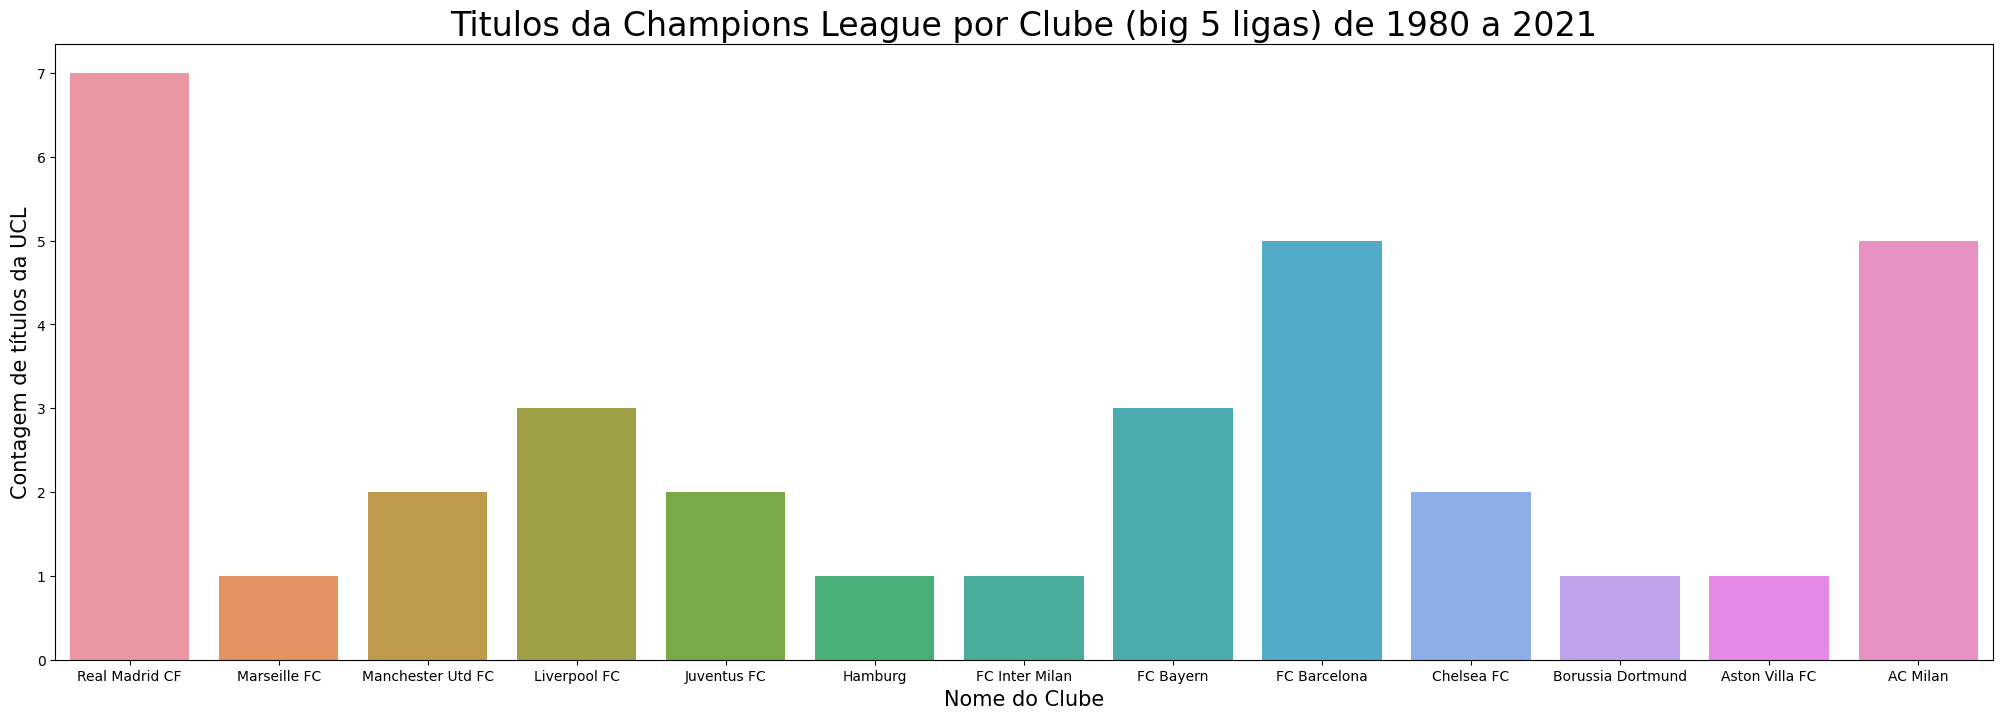

In [333]:
fig, ax = plt.subplots(figsize = (25, 8))
sns.countplot(x = 'name', data = vencedores_champions_big5, hue_order = 'name')
ax.set_xlabel('Nome do Clube', size = 15)
ax.set_ylabel('Contagem de títulos da UCL', size = 15)
ax.set_title ('Titulos da Champions League por Clube (big 5 ligas) de 1980 a 2021', size = 24)
plt.show()

#### Ranking dos Campeões da UCL por País/Liga (1980 a 2021)

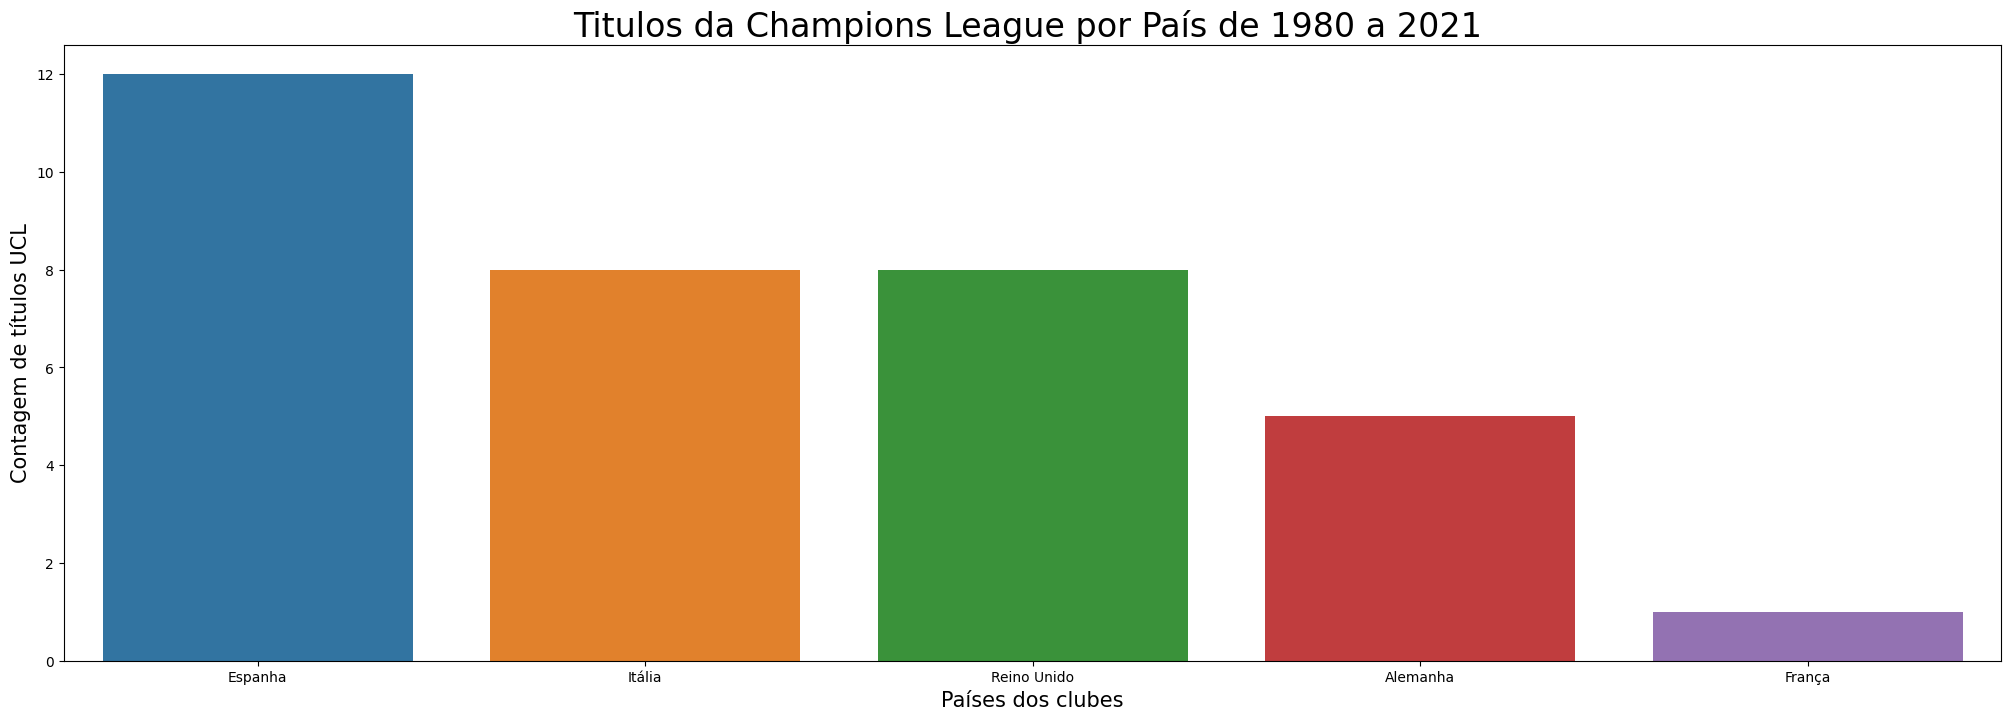

In [334]:
fig, ax = plt.subplots(figsize = (25, 8))
sns.barplot(x = 'país', y = 'fase_alcancada', data = vencedores_champions_big5_por_pais)
ax.set_xlabel('Países dos clubes', size = 15)
ax.set_ylabel('Contagem de títulos UCL', size = 15)
ax.set_title ('Titulos da Champions League por País de 1980 a 2021 ', size = 24)
plt.show()

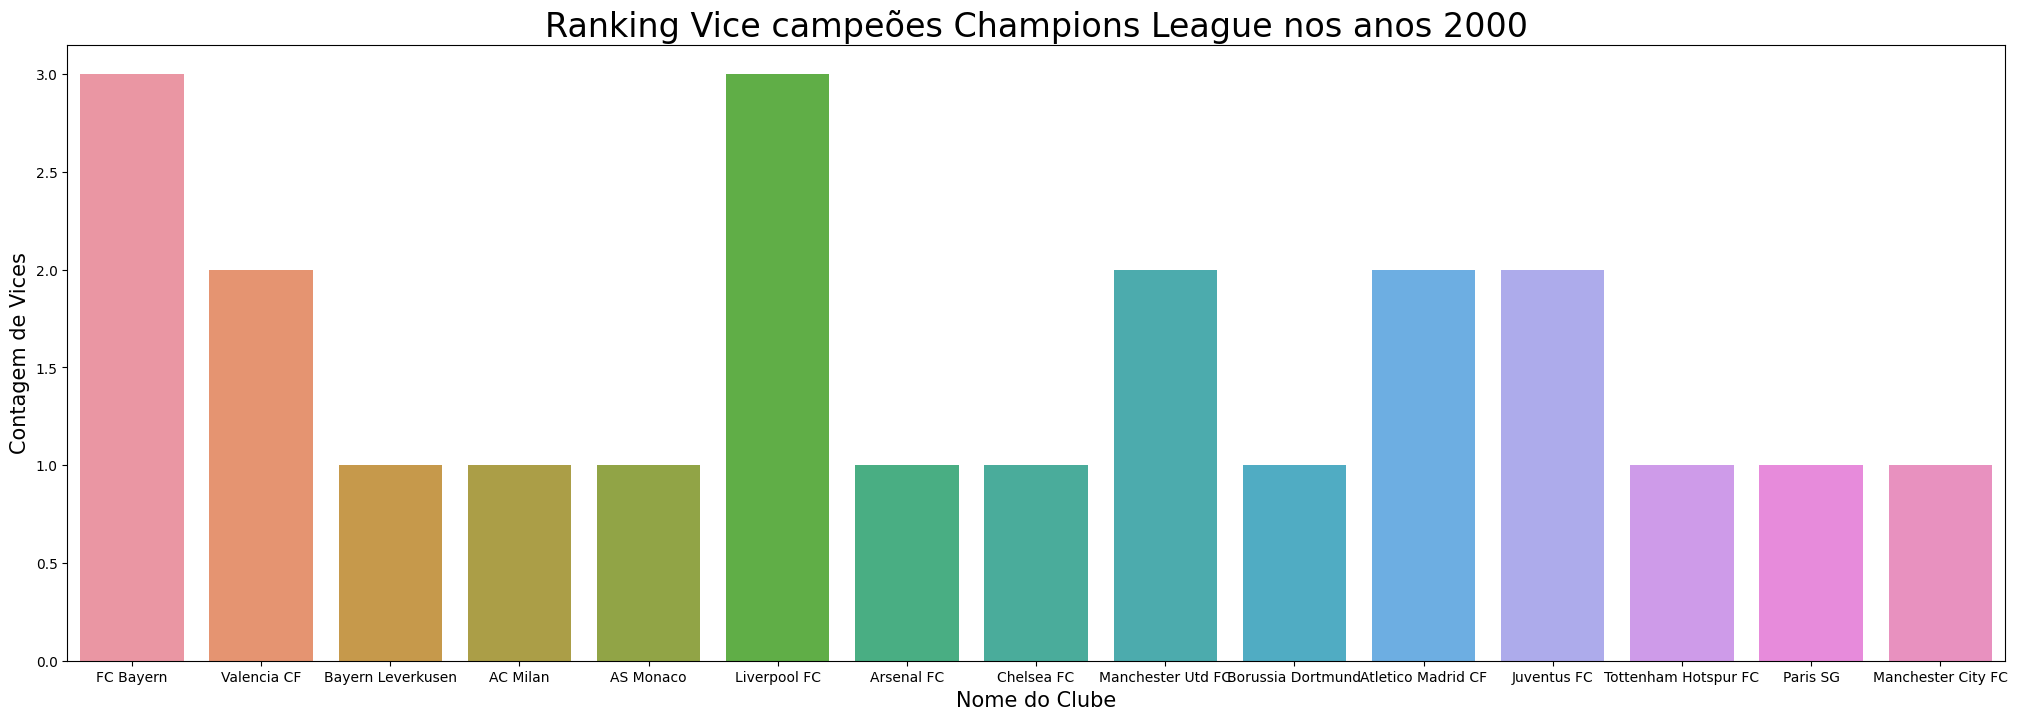

In [337]:
fig, ax = plt.subplots(figsize = (25, 8))
sns.countplot(x = 'name', data = finalistas_anos_2000, hue_order = 'name')
ax.set_xlabel('Nome do Clube', size = 15)
ax.set_ylabel('Contagem de Vices', size = 15)
ax.set_title ('Ranking Vice campeões Champions League nos anos 2000', size = 24)
plt.show()